# Autobop Tutorial 2 (using Jupyter)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pylab 

from classAutobop import track
import autobop
import sheet
import numpy as np
import brownbop
import sound_definition
import debugraphic

### setting

In [2]:
# read a band file
band=autobop.read_personnel("brown.band")

In [3]:
# your band members are john (melody: MIDI ch1), paul (bass: MIDI ch3), 
# tommy (piano: MIDI ch2), and art (drum: MIDI ch4). 
band

{b'art': {'ch': 4,
  'module': <module 'rhythmmachine' from '/home/kawahara/autobop/src/rhythmmachine.py'>,
  'option': b'swing'},
 b'john': {'ch': 1,
  'module': <module 'brownbop' from '/home/kawahara/autobop/src/brownbop.py'>,
  'option': b'melody,test.ss'},
 b'paul': {'ch': 3,
  'module': <module 'brownbop' from '/home/kawahara/autobop/src/brownbop.py'>,
  'option': b'bass,test.ss'},
 b'tommy': {'ch': 2,
  'module': <module 'brownbop' from '/home/kawahara/autobop/src/brownbop.py'>,
  'option': b'piano,test.ss'}}

In [4]:
# read a chord progression file
tseq, tkseq = sheet.read("giant.abs")

In [5]:
# tseq describes a sequence of tonic sg notes (from 0 to 11), which is different from the MIDI note.
# tseq[0:3] #-> array([[11],[ 2],[ 7]])
# you can know the correspondance of values of notes to CDEF... using getsg().  
sg=sound_definition.getsg()
sg[3]

'Eb'

In [6]:
# tkseq specifies a sequence of chord types
# tkseq[0:3] #-> array(['Maj7', '7', 'Maj7'], dtype='|S4')

In [7]:
# of repititions
nsamp=3
tkseq = np.tile(tkseq, nsamp)
tseq = np.tile(tseq, (nsamp,1))

In [8]:
# bpm
bpm=320

In [9]:
# defining the duration of the tonic sequence (tonic duration; tdur)
chordlength = 960
tdur = np.full( len(tseq), chordlength, dtype=int )

In [10]:
# time of tdur
ttime=np.cumsum(tdur)

### initialize

In [11]:
control={} #current atmosphere
trkband={}
eachtcur={}
for part in band.keys():
    player = band[part]
    trkband[part]=track()
    #set control 
    eachtcur[part]=0
    control[part]=player['module'].initialize(str(player["option"],"utf-8"))
    
control["tcur"]=eachtcur  # each current time of a player

READ melody.farey
n 4
amplitude 30.0
[b'1/4' b'1/3' b'1/2' b'2/3' b'3/4'] <=


In [14]:
print(control[b'john'])

{'storydict': {'general': {'inst': ['melody', 'piano', 'bass', 'secondmel'], 'n': [10.0], 'bpm': [380.0]}, 'melody': {'master': [1.0], 'finger': [1.0], 'oct': [0.0], 'teff': [0.4, 0.2, 0.7, 0.5, 0.6, 0.2, 0.6, 0.2], 'H': [0.4, 0.2, 0.6, 0.5, 0.6, 0.3, 0.2], 'J': [2.0, 2.1, 2.2, 1.9], 'gauss-farey': ['melody.farey'], 'teff_estab': [0.2], 'len_estab': [4.0], 'stab': [0.5, 1.0], 'beat': [0.0, 240.0], 'blen': [480.0], 'velstab': [10.0, 0.0], 'velocgen': ['out.vel'], 'celfile': ['cel.list'], 'rhythm_pattern': ['rhythmgen'], 'rhyfile': ['test.rhy'], 'noct': [2.0], 'timer_stop_width': [10.0], 'timer_stop_c': [55.0], 'timer_start_width': [3.0], 'timer_start_c': [15.0]}, 'secondmel': {'master': [1.0], 'finger': [1.0], 'oct': [0.0], 'teff': [0.3, 0.5, 0.4, 0.7, 1.3, 1.5, 2.5], 'H': [0.6, 0.7, 0.4, 0.5, 0.3, 0.5, 0.7, 0.6], 'J': [3.0, 2.5, 3.0, 2.5], 'off': ['-1', '61440'], 'gauss-farey': ['secondmel.farey'], 'teff_estab': [0.2], 'len_estab': [4.0], 'stab': [0.7, 1.0], 'beat': [0.0, 240.0], 'blen

### main loop

In [15]:
while min( control['tcur'].values() ) < ttime[-1]:
    part = min( control['tcur'].items(), key=lambda x:x[1])[0]
    player=band[part]       
    trk, control = player['module'].improvise(tseq, tkseq, ttime, part, control)
    trkband[part].join(trk)
    control['tcur'][part] = np.sum(trkband[part].dur)

b'john' H= 0.4 J= 2.0 teff 0.4
Farey = 3 / 4
rhythmgen
test.rhy
b'tommy' H= 0.8 J= 2.0 teff 0.1
b'paul' H= 0.6 J= 2.0 teff 0.025
b'paul' H= 0.6 J= 2.0 teff 0.025
b'john' H= 0.2 J= 2.1 teff 0.2
Farey = 1 / 2
rhythmgen
test.rhy
b'tommy' H= 0.9 J= 2.0 teff 0.1
b'paul' H= 0.6 J= 2.0 teff 0.025
b'john' H= 0.6 J= 2.2 teff 0.7
Farey = 1 / 4
rhythmgen
test.rhy
b'paul' H= 0.6 J= 2.0 teff 0.025
b'john' H= 0.5 J= 1.9 teff 0.5
Farey = 1 / 2
rhythmgen
test.rhy
b'tommy' H= 0.7 J= 2.0 teff 0.1
b'john' H= 0.6 J= 2.0 teff 0.6
Farey = 2 / 3
rhythmgen
test.rhy
b'paul' H= 0.6 J= 2.0 teff 0.025
b'john' H= 0.3 J= 2.1 teff 0.2
Farey = 1 / 3
rhythmgen
test.rhy


In [16]:
# triming 
for part in trkband:
        trkband[part].truncate( ttime[-1] )

### results

In [17]:
trkband

{b'art': <classAutobop.track at 0x7f32ec2063c8>,
 b'john': <classAutobop.track at 0x7f32ec1e4e48>,
 b'paul': <classAutobop.track at 0x7f32ec1f9c88>,
 b'tommy': <classAutobop.track at 0x7f32ec1e4ef0>}

#### There are three fundamental methods in track class: duration, MIDI note, and velocity

In [19]:
# duration
trkband[b'john'].dur[0:5]

array([  1, 479, 240, 240, 480])

In [20]:
# MIDI notes  
trkband[b'john'].note[0:5]

array([[-64],
       [ 66],
       [-64],
       [ 61],
       [ 62]])

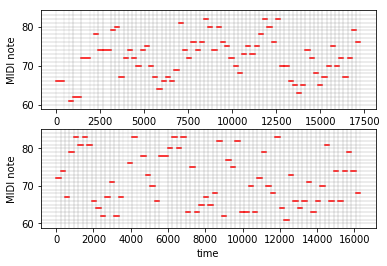

In [21]:
# display MIDI notes of john
fig = plt.figure()
ax=fig.add_subplot(211)
debugraphic.plot_midiseq(ax,trkband[b'john'].note[0:100], trkband[b'john'].dur[0:100]) 
ax=fig.add_subplot(212)
debugraphic.plot_midiseq(ax,trkband[b'john'].note[100:200], trkband[b'john'].dur[100:200]) 
plt.show()

In [22]:
# velocity
trkband[b'john'].vel[0:5]

array([[10],
       [87],
       [10],
       [73],
       [87]])